# Tool for the calculation of the mass balance gradient 

## Imports

In [1]:
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
import pandas as pd
from scipy import stats
import pylab

from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

## Main procedure

Read the data points from csv-file (best way to do it is using pandas)

In [2]:
dt = pd.read_csv('/home/pelto/Desktop/ice_flux/kokanee_b_dot.csv')

# if you want to take a look at what is read, remove comment of:
dt[:5]

,ID,Elev,Ba,Year,type
0,KST55,2309,-1.74,2018,obs
1,KST55L_17,2315,-2.00,2018,obs
2,KST50,2364,-1.42,2018,obs
3,KST45,2459,-0.81,2018,obs
4,KST40,2476,-0.25,2018,obs


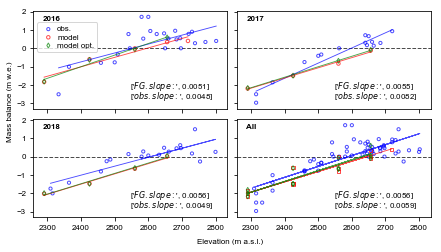

In [3]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 8}

plt.rc('font', **font)

fig, axarr = plt.subplots(2,2, sharex=True, sharey=True, figsize=(6,3.34))#3.34, 3.34))
j,k=0,0    ## only define j if one row
n = 0
s= 10 #markersize
year = 2016, 2017, 2018
a = 0.7

# dt.Year.nunique()
if n < 3:
    for yr in year:

        x_ax_obs=dt[(dt.Year==yr) & (dt.type=='obs')].Elev
        y_ax_obs=dt[(dt.Year==yr) & (dt.type=='obs')].Ba

        x_ax_mod=dt[(dt.Year==yr) & (dt.type=='gate')].Elev
        y_ax_mod=dt[(dt.Year==yr) & (dt.type=='gate')].Ba

        x_ax_mod_opt=dt[(dt.Year==yr) & (dt.type=='gateO')].Elev
        y_ax_mod_opt=dt[(dt.Year==yr) & (dt.type=='gateO')].Ba

        ### observations of SMB
        slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(x_ax_obs),np.array(y_ax_obs))
        axarr[j,k].scatter(x_ax_obs,y_ax_obs,color='b', label='obs.', alpha=a, s=s,facecolor='')
        axarr[j,k].plot(x_ax_obs,slope*x_ax_obs+intercept, color='b',label='', alpha=a, linewidth=0.9)

        ### flux gate from GPR thickness
        slopeM, interceptM, r_valueM, p_valueM, std_errM = stats.linregress(np.array(x_ax_mod),np.array(y_ax_mod))
        axarr[j,k].scatter(x_ax_mod,y_ax_mod,color='r', label='model', alpha=a, s=s+2, facecolor='')
        axarr[j,k].plot(x_ax_mod,slopeM*x_ax_mod+interceptM, color='r', label='', alpha=a, linewidth=0.9)
        axarr[j,k].text(0.5, 0.1, ['$obs. slope:$', np.round(slope,4)], transform=axarr[j,k].transAxes)
        axarr[j,k].text(0.5, 0.2, ['$FG. slope:$', np.round(slopeM,4)], transform=axarr[j,k].transAxes)

        axarr[j,k].text(0.05, 0.9, year[n], transform=axarr[j,k].transAxes, fontweight='bold')
        
        ###flux gate from optimized thickness
        slopeM_opt, interceptM_opt, r_valueM_opt, p_valueM_opt, std_errM_opt = stats.linregress(np.array(
            x_ax_mod_opt),np.array(y_ax_mod_opt))
        axarr[j,k].scatter(x_ax_mod_opt,y_ax_mod_opt,color='g', label='model opt.', alpha=a, s=s+2, facecolor='', marker='d')
        axarr[j,k].plot(x_ax_mod_opt,slopeM_opt*x_ax_mod_opt+interceptM_opt, color='g', label='', alpha=a, linewidth=0.9)
        axarr[j,k].axhline(linewidth=1, color='k', ls='--', alpha=a, zorder=0)
        n += 1

        k += 1
        if n == 2: 
            j += 1
            k = 0
            
# elif n == 3:
x_ax_obs=dt[dt.type=='obs'].Elev
y_ax_obs=dt[dt.type=='obs'].Ba

x_ax_mod=dt[dt.type=='gate'].Elev
y_ax_mod=dt[dt.type=='gate'].Ba

x_ax_mod_opt=dt[dt.type=='gateO'].Elev
y_ax_mod_opt=dt[dt.type=='gateO'].Ba

### observations of SMB
slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(x_ax_obs),np.array(y_ax_obs))
axarr[1,1].scatter(x_ax_obs,y_ax_obs,color='b', label='obs', alpha=a, s=s, facecolor='')
axarr[1,1].plot(x_ax_obs,slope*x_ax_obs+intercept, color='b', label='', alpha=a, linewidth=0.9)

### flux gate from GPR thickness
slopeM, interceptM, r_valueM, p_valueM, std_errM = stats.linregress(np.array(x_ax_mod),np.array(y_ax_mod))

slopeM_opt, interceptM_opt, r_valueM_opt, p_valueM_opt, std_errM_opt = stats.linregress(np.array(
    x_ax_mod_opt),np.array(y_ax_mod_opt))

axarr[j,k].axhline(linewidth=1, color='k', ls='--', alpha=a, zorder=0)

axarr[1,1].scatter(x_ax_mod_opt,y_ax_mod_opt,color='g', label='mod. opt', alpha=a, s=s+2, marker='d',zorder=20, facecolor='')
axarr[1,1].plot(x_ax_mod_opt,slopeM_opt*x_ax_mod_opt+interceptM_opt, color='g', label='', alpha=a, zorder=20, linewidth=0.9)
axarr[1,1].scatter(x_ax_mod,y_ax_mod,color='r', label='mod', alpha=a, s=s, marker='s', facecolor='')
axarr[1,1].plot(x_ax_mod,slopeM*x_ax_mod+interceptM, color='r', label='', alpha=a, linewidth=0.9)
axarr[j,k].text(0.05, 0.9, 'All', transform=axarr[j,k].transAxes, fontweight='bold')
axarr[j,k].text(0.5, 0.1, ['$obs. slope:$', np.round(slope,4)], transform=axarr[j,k].transAxes)
axarr[j,k].text(0.5, 0.2, ['$FG. slope:$', np.round(slopeM,4)], transform=axarr[j,k].transAxes)



fig.subplots_adjust(bottom=0.12, top=0.98, hspace=0.1, left=0.07, right=0.99, wspace=0.05)#left=0.07, right=0.9,wspace=0.05, 
fig.text(0.01, 0.75, 'Mass balance (m w.e.)', rotation=90)
fig.text(0.45, 0.01, 'Elevation (m a.s.l.)')    
axarr[0,0].legend(loc='best', bbox_to_anchor=(0, 0.42, 0.7, 0.5), labelspacing=0.2, handletextpad=0.1)
plt.savefig('/home/pelto/Desktop/ice_flux/kokanee_bdot.png', dpi=300)

In [ ]:
n

In [ ]:
# conrad_data = [filter_nan(dt.iloc[ :,0].tolist()),filter_nan(dt.iloc[ :,1].tolist())]
# zillmer_data = [filter_nan(dt.iloc[ :,12].tolist()),filter_nan(dt.iloc[ :,13].tolist())]
# nordic_data = [filter_nan(dt.iloc[ :,9].tolist()),filter_nan(dt.iloc[ :,10].tolist())]
kokanee_data = [filter_nan(dt.Elev.tolist()),filter_nan(dt.Ba.tolist())]
data_2016 = [filter_nan(dt.Elev[dt.Year==2016].tolist()),filter_nan(dt.Ba[dt.Year==2016].tolist())]
# data_2017 = [filter_nan(dt.Ba.tolist()),filter_nan(dt.Elev.tolist())]
# data_2018 = [filter_nan(dt.Ba.tolist()),filter_nan(dt.Elev.tolist())]

year = 2016, 2017, 2018

# & type==dt.obs

# for y in year:
#      V=data[dt.glacier==year]

# ille_data = [filter_nan(dt.Elevation_i.tolist()),filter_nan(dt.Ba_i.tolist())]
# castle_data = [filter_nan(dt.Elevation_cc.tolist()),filter_nan(dt.Ba_cc.tolist())]

# check the number of data points in each glacier-specific array

print('Number of Data-points: \n Kokanee: ', len(kokanee_data[0]))
# print('Number of Data-points: \n Conrad: ', len(conrad_data[0]), '\n Zillmer: ', len(zillmer_data[0]),'\n Nordic: ', len(nordic_data[0]),'\n Kokanee: ', len(kokanee_data[0]),'\n Ille: ', len(ille_data[0]), '\n Castle: ', len(castle_data[0]))

In [ ]:
# font = {'family' : 'Arial',
#         'weight' : 'normal',
#         'size'   : 8}

# plt.rc('font', **font)

# # xmax=170
# # ymax=170

# # Create plot
# fig, axarr = plt.subplots(2,4, sharex=True, sharey=False, figsize=(6,3.34))#3.34, 3.34))
# # ax = fig.add_subplot(1, 1, 1) 
# j, k = 0, 0
# markers = ('o', 's', 'D', '^', 'v', 'p', 'D')
# colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462', '#b3de69']
# letter = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
# year = 2016, 2017, 2018  
# #['Zillmer', 'Nordic', 'Illecillewaet', 'W.Wash', 'Haig', 'Conrad', 'Kokanee']
# ################
# count=0

# for year in year:
#     V=data[data_table.glacier==year]
# #     print(data.glacier)
# #     V['dfb'][V['dfb'] > 0.5] = np.nan

we combine all data for the last plot

In [ ]:
# combined_x_data=conrad_data[0]+zillmer_data[0]+nordic_data[0]+kokanee_data[0]+ille_data[0]+castle_data[0]
# combined_y_data=conrad_data[1]+zillmer_data[1]+nordic_data[1]+kokanee_data[1]+ille_data[1]+castle_data[1]

# #w/o illec data ---illec SMB lacks measurements over upper 200 m of glacier range, thus potentially biasing SMB grad.
# combined_x_data2=conrad_data[0]+zillmer_data[0]+nordic_data[0]+kokanee_data[0]
# combined_y_data2=conrad_data[1]+zillmer_data[1]+nordic_data[1]+kokanee_data[1]

# #w/o castle
# combined_x_data3=conrad_data[0]+zillmer_data[0]+nordic_data[0]+kokanee_data[0]+ille_data[0]
# combined_y_data3=conrad_data[1]+zillmer_data[1]+nordic_data[1]+kokanee_data[1]+ille_data[1]


# # filter 'nan' (otherwise we get a lot of errors)
# combined_x_data=[x for x in combined_x_data if str(x) != 'nan']
# combined_y_data=[x for x in combined_y_data if str(x) != 'nan']

# #w/o illec data
# combined_x_data=[x for x in combined_x_data if str(x) != 'nan']
# combined_y_data=[x for x in combined_y_data if str(x) != 'nan']

## The actual analysis

We start with getting the hypsometries from the csv-file and make plottable datapoints out of them

In [ ]:
hypso = pd.read_csv('/home/pelto/Desktop/lidar_cbt_analysis/Ba/Hypsometry/hypsometry_study_glaciers.csv')

hypso_conrad= clear_nan_hypso([hypso.iloc[ :,1].tolist(),hypso.iloc[ :,2].tolist()])
hypso_zillmer= clear_nan_hypso([hypso.iloc[ :,1].tolist(),hypso.iloc[ :,3].tolist()])
hypso_nordic= clear_nan_hypso([hypso.iloc[ :,1].tolist(),hypso.iloc[ :,4].tolist()])
hypso_kokanee= clear_nan_hypso([hypso.iloc[ :,1].tolist(),hypso.iloc[ :,6].tolist()])
hypso_ille= clear_nan_hypso([hypso.iloc[ :,1].tolist(),hypso.iloc[ :,7].tolist()])
hypso_castle= clear_nan_hypso([hypso.iloc[ :,1].tolist(),hypso.iloc[ :,8].tolist()])

### Conrad glacier

In [ ]:
# analyse(hypso_conrad, conrad_data, 'blue')

### Zillmer glacier

In [ ]:
# analyse(hypso_zillmer, zillmer_data, 'red')


### Nordic glacier

In [ ]:
# analyse(hypso_nordic, nordic_data, 'green')

### Kokanee glacier

In [ ]:
analyse(hypso_kokanee, kokanee_data, 'orange') #data_2016

### Illecilewaet Glacier 

In [ ]:
analyse(hypso_ille, ille_data, 'purple')

In [ ]:
analyse(hypso_castle, castle_data, 'brown')

## Total plot with unweighted fit

not much physical basis for weighting in the manner tried above, so we use unweighted values

In [ ]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 8}

plt.rc('font', **font)

plt.rcParams["figure.figsize"] = [3.34, 3.34] #[7.04, 6.04]
    #JoG figure reqs: (maximum widths: 85 mm single-column; 179 mm double-column) or 3.34 and 7.04 in
s=2.5
alpha = 0.5
plt.plot(conrad_data[0],conrad_data[1],marker='d', markersize=s, linestyle='', color='blue', label='Conrad', alpha=alpha)
plt.plot(zillmer_data[0],zillmer_data[1],marker='s', markersize=s, linestyle='', color='red', label='Zillmer', alpha=alpha)
plt.plot(nordic_data[0],nordic_data[1],marker='+', markersize=s, markeredgewidth=2., linestyle='', color='green', label='Nordic', alpha=alpha)
plt.plot(kokanee_data[0],kokanee_data[1],marker='o', markersize=s, linestyle='', color='orange', label='Kokanee', alpha=alpha)
plt.plot(ille_data[0],ille_data[1],marker='^', markersize=s, linestyle='', color='purple', label='Illecillewaet', alpha=alpha)
plt.plot(castle_data[0],castle_data[1],marker='p', markersize=s, linestyle='', color='brown', label='Castle Creek', alpha=alpha)

x_data_fit=np.linspace(np.min(combined_x_data),np.max(combined_x_data),1000)
x_data_fit2=np.linspace(np.min(combined_x_data2),np.max(combined_x_data2),1000)
x_data_fit3=np.linspace(np.min(combined_x_data3),np.max(combined_x_data3),1000)


print('the net gradient is:           ', np.round(fit(x_data_fit, combined_x_data,combined_y_data)[0]*1000,2) ,' +/- ' , np.round(fit(x_data_fit, combined_x_data,combined_y_data)[4]*1000,2), 'm w.e. m-1')
print('the net gradient w/o illec is: ', np.round(fit(x_data_fit2, combined_x_data2,combined_y_data2)[0]*1000,2) ,' +/- ' , np.round(fit(x_data_fit2, combined_x_data2,combined_y_data2)[4]*1000,2), 'm w.e. m-1')
print('the net gradient w/o castle is: ', np.round(fit(x_data_fit3, combined_x_data3,combined_y_data3)[0]*1000,2) ,' +/- ' , np.round(fit(x_data_fit3, combined_x_data3,combined_y_data3)[4]*1000,2), 'm w.e. m-1')
# print('the net gradient r2 value is:', 'at p-value:',)

slope, intercept, r_value, p_value, std_err = stats.linregress(combined_x_data,combined_y_data)
print("slope gradient: %f    intercept: %f" % (slope, intercept), "  R-squared: %f" % r_value**2,  'p-value:', p_value)
slope, intercept, r_value, p_value, std_err = stats.linregress(combined_x_data2,combined_y_data2)
print("sloperadient w/o illec: %f    intercept: %f" % (slope, intercept), "  R-squared: %f" % r_value**2,  'p-value:', p_value)
slope, intercept, r_value, p_value, std_err = stats.linregress(combined_x_data3,combined_y_data3)
print("slope gradient w/o castle: %f    intercept: %f" % (slope, intercept), "  R-squared: %f" % r_value**2,  'p-value:', p_value)

#plot lines of best fit for individual glaciers
plt.plot(x_data_fit, linear_function(fit(x_data_fit, conrad_data[0],conrad_data[1])[0], fit(x_data_fit, conrad_data[0],conrad_data[1])[1], x_data_fit), color='blue', linestyle='--', linewidth=1.5)
plt.plot(x_data_fit, linear_function(fit(x_data_fit, zillmer_data[0], zillmer_data[1])[0], fit(x_data_fit, zillmer_data[0], zillmer_data[1])[1], x_data_fit), color='red', linestyle='--', linewidth=1.5)
plt.plot(x_data_fit, linear_function(fit(x_data_fit, nordic_data[0],nordic_data[1])[0], fit(x_data_fit, nordic_data[0],nordic_data[1])[1], x_data_fit), color='green',linestyle='--', linewidth=1.5)
plt.plot(x_data_fit, linear_function(fit(x_data_fit, kokanee_data[0],kokanee_data[1])[0], fit(x_data_fit, kokanee_data[0],kokanee_data[1])[1], x_data_fit), color='orange',linestyle='--', linewidth=1.5)
plt.plot(x_data_fit, linear_function(fit(x_data_fit, ille_data[0],ille_data[1])[0],fit(x_data_fit, ille_data[0],ille_data[1])[1], x_data_fit), color='purple',linestyle='--', linewidth=1.5)
plt.plot(x_data_fit, linear_function(fit(x_data_fit, castle_data[0],castle_data[1])[0],fit(x_data_fit, castle_data[0],castle_data[1])[1], x_data_fit), color='brown',linestyle='--', linewidth=1.5)

#plot lines of best fit for all points
plt.plot(x_data_fit, linear_function(fit(x_data_fit, combined_x_data,combined_y_data)[0], fit(x_data_fit, combined_x_data,combined_y_data)[1], x_data_fit), color='black', linewidth=2., label='Basin grad.')
# plt.plot(x_data_fit2, linear_function(fit(x_data_fit2, combined_x_data2,combined_y_data2)[0], fit(x_data_fit2, combined_x_data2,combined_y_data2)[1], x_data_fit2), color='black', linewidth=2., label='CB less Illec.')
# plt.fill_between(x_data_fit, y-0.25, y+0.25)

plt.ylim(-7,4)
plt.xlabel('Elevation (m a.s.l.)')
plt.ylabel('Mass Balance (m w.e.)')
plt.rcParams["figure.figsize"] = [7,5]
plt.tight_layout()
plt.legend(loc=4)
plt.grid(True, linestyle='--', alpha=0.85)
plt.savefig('/home/pelto/Desktop/lidar_cbt_analysis/Ba/products/all_gradients.pdf', dpi=300)

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

plt.rcParams["figure.figsize"] = [7.04, 6.04]
    #JoG figure reqs: (maximum widths: 85 mm single-column; 179 mm double-column) or 3.34 and 7.04 in

alpha = 0.5

plt.plot(castle_data[0],castle_data[1],marker='p', markersize=10., linestyle='', color='#2ca25f', label='Castle Creek', alpha=alpha)

plt.plot(x_data_fit, linear_function(fit(x_data_fit, castle_data[0],castle_data[1])[0],fit(x_data_fit, castle_data[0],castle_data[1])[1], x_data_fit), color='k',linestyle='--', linewidth=1.5)


plt.ylim(-6,2)
plt.xlim(1700,2800)
plt.xlabel('Elevation [m a.s.l.]')
plt.ylabel('Mass Balance [m w.e.]')
plt.rcParams["figure.figsize"] = [7,5]
plt.tight_layout()
plt.legend(loc=4)
plt.grid(True, linestyle='--')
plt.savefig('/home/pelto/Desktop/lidar_cbt_analysis/Ba/products/castle_gradient.png', dpi=300)